In [2]:
# 构建Hopfield网络
import numpy as np
import matplotlib.pyplot as plt 
class HopfieldTSPSolver():
    def __init__(self,cities):
        self.cities = cities
        self.n = cities.shape[0]
        self.u0 = 0.02
        self.delta_t = 1e-4
        self.A = 200
        self.D = 100
        self.W = np.zeros((self.n,self.n))
        self.U = np.zeros((self.n,self.n))
        self.V = np.zeros((self.n,self.n))
        self.init_weight()
        self.init_node()
    def init_weight(self,):
        for i in range(self.n):
            for j in range(self.n):
                self.W[i,j] = np.sqrt(np.sum((self.cities[i] - self.cities[j])**2))
    def init_node(self):
        for i in range(self.n):
            for j in range(self.n):
                self.U[i,j] = 0.5 * self.u0 * np.log(self.n-1) + np.random.random() * 2-1
    
    def diff(self,i,j):
        t = j+1 if j+1 < self.n else 0
        return -self.A*(np.sum(self.V[i]) -1) - self.A*(np.sum(self.V[:,j]) -1) - self.D * self.W[i,:].dot(self.V[:,t])    
    def get_energy(self):
        energy = 0.
        for i in range(self.n):
            energy += 0.5 * self.A * (np.sum(self.V[i,:]) - 1)**2
            energy += 0.5 * self.A * (np.sum(self.V[:,i]) - 1)**2
            for j in range(self.n):
                for k in range(self.n):
                    t = k+1 if k+1 < self.n else 0
                    energy += 0.5 * self.D * self.W[i,j] * self.V[i,k] * self.V[j,t]
        return energy
    def check(self):
        pos = np.where(self.V<0.2,0,1)
        flag = True
        if np.sum(pos) != self.n:
            flag = False
        for i in range(self.n):
            if np.sum(pos[:,i]) != 1:
                flag = False
            if np.sum(pos[i,:]) != 1:
                flag = False
        return flag
    def __call__(self):
        running_energy = []
        iter = 0
        while not self.check():
            iter +=1
            for i in range(self.n):
                for j in range(self.n):
                    self.U[i,j] += self.delta_t * self.diff(i,j)
            self.V = 0.5 * (1 + np.tanh(self.U / self.u0))
            energy = self.get_energy()
            running_energy.append(energy)
        return running_energy,np.where(self.V<0.2,0,1),iter


[[0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]]
389


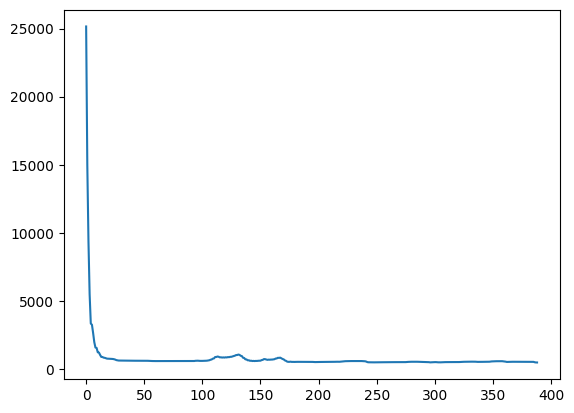

In [3]:
# 输入城市在地图上的位置(x,y)
cities = np.array([[2,6],[2,4],[1,3],[4,6],[5,5],[4,4],[6,4],[3,2]])
solver = HopfieldTSPSolver(cities)
energy,answer,iter = solver()
print(answer)
print(iter)
plt.plot(energy)    
plt.show()

[[1, 3], [2, 4], [2, 6], [4, 6], [5, 5], [6, 4], [4, 4], [3, 2]]


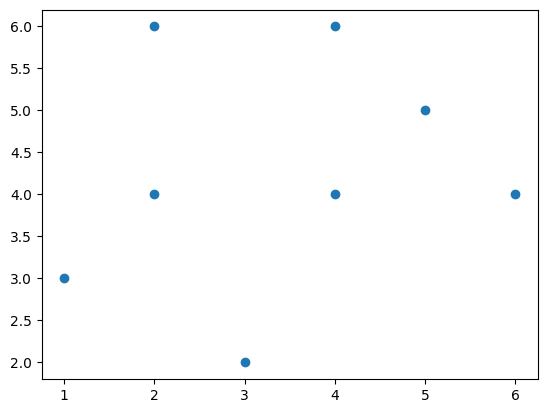

In [7]:
# print路线
ans=[]
for j in range(8):
    for i in range(8):
        if answer[i,j]==1:
            ans.append(list(cities[i]))
print(ans)
# print 平面位置图
plt.scatter(cities[:,0],cities[:,1])